## Raquel Senior
# Assignement 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df= pd.read_csv("/Users/raquelsenior/Desktop/QMSS/Adv_ML/worldhappiness2019.csv")

df.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
df_region = pd.read_csv("/Users/raquelsenior/Desktop/QMSS/Adv_ML/region.csv")

In [3]:
df_region.head()
pd.api.types.is_string_dtype(df_region['region'])

True

In [4]:
mergedata=pd.merge(df, df_region, how='left', left_on='Country or region', right_on='name')
# Check for missing values (there won't be any given that I have already cleaned up the region data)
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)

# clean up final region data
# data=mergedata.drop(['Happiness_level'],axis=1)
data=mergedata.drop(['name'],axis=1)
data=data.drop(['Country or region'],axis=1)
data=data.drop(['sub-region'],axis=1)


data

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe
5,Very High,1.452,1.526,1.052,0.572,0.263,0.343,Europe
6,Very High,1.387,1.487,1.009,0.574,0.267,0.373,Europe
7,Very High,1.303,1.557,1.026,0.585,0.330,0.380,Oceania
8,Very High,1.365,1.505,1.039,0.584,0.285,0.308,Americas
9,Very High,1.376,1.475,1.016,0.532,0.244,0.226,Europe


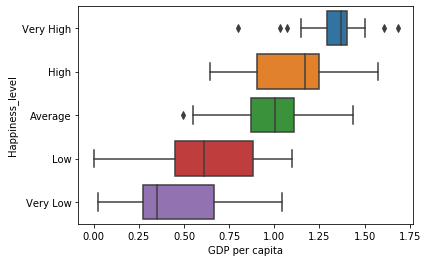

In [5]:
import seaborn as sns
sns.boxplot(x="GDP per capita", y="Happiness_level", data=df)
plt.show()

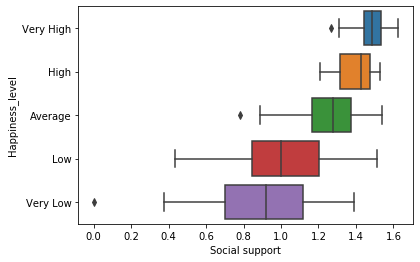

In [6]:
sns.boxplot(x="Social support", y="Happiness_level", data=df)
plt.show()

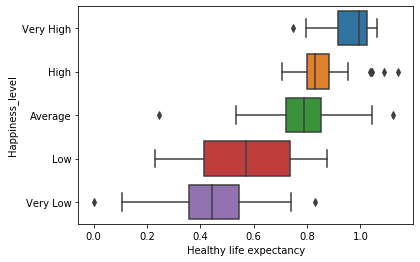

In [7]:
sns.boxplot(x="Healthy life expectancy", y="Happiness_level", data=df)
plt.show()

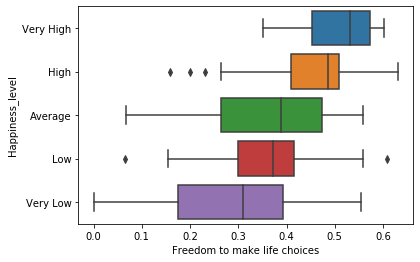

In [8]:
sns.boxplot(x="Freedom to make life choices", y="Happiness_level", data=df)
plt.show()

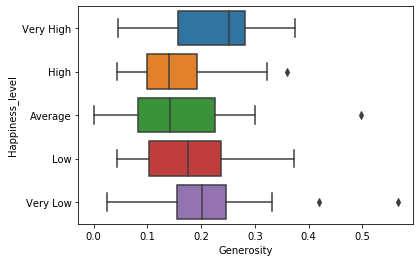

In [9]:
sns.boxplot(x="Generosity", y="Happiness_level", data=df)
plt.show()

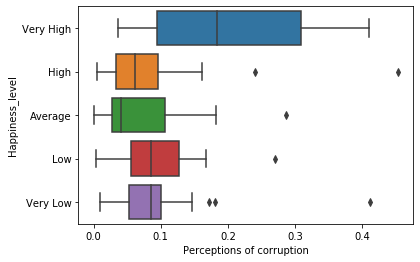

In [10]:
sns.boxplot(x="Perceptions of corruption", y="Happiness_level", data=df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [13]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y=data['Happiness_level']
X=data.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(117, 7)
(117,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'region']


In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

import pickle
pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )

In [15]:
# Check shape for keras input:
prediction_input_preprocessor.transform(X_train).shape 

(117, 11)

In [16]:
# Check shape for keras output:
pd.get_dummies(y_train).shape

(117, 5)

In [17]:
# Feature Selection: Random forest 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)
formodel = forest.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))


print(formodel.feature_importances_)


[0.20407471 0.16970883 0.18155172 0.13411991 0.09711037 0.13401045
 0.02317548 0.02060729 0.02129561 0.01394199 0.00040364]


In [18]:
sfm = SelectFromModel(formodel, threshold=.25)
sfm.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))
Xtrain_new = sfm.transform(prediction_input_preprocessor.transform(X_train)) # transform data to insert into new model

print(prediction_input_preprocessor.transform(X_train).shape)

(117, 11)


/Users/raquelsenior/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In the case above, no variables were dropped

In [19]:
# Feature selection: Lasso 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty='l1', solver='saga')
lasso.fit(prediction_input_preprocessor.transform(X_train), y_train)

model = SelectFromModel(lasso, prefit=True)

X_new = model.transform(prediction_input_preprocessor.transform(X_train))
print(X_new.shape)


(117, 9)


/Users/raquelsenior/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In the case above, two variables were selected. So, Lasso "zeroed out" 2 features of the original 11 features. 

In [ ]:
# Predicting model: KNN
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold() 

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())


knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)} # remember, use two underscores before n, "__n"
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=skfold).fit(X_train, y_train)


print("KNN for CLASSIFICATION")
print("Test set Score: {:.2f}".format(knn_grid.score(X_test, y_test)))
print("Best Cross-Validation Score: {:.2f}".format(knn_grid.best_score_))
print("Best Parameter: {}".format(knn_grid.best_params_))



KNN for CLASSIFICATION

Test set Score: 0.04

Best Parameter: {'kneighborsregressor__n_neighbors': 9}

Cross-validation suggest that k=9 is the best parameter for this KNN regression, which yields an average accuracy score of 4%

In [20]:
# Prediction model: Random forest
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict


model=RandomForestClassifier(n_estimators=1000, random_state = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

print("Random Forest Classifier's cross validation accuracy:", np.mean(cross_val_score(model, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("Random Forest Classifier's Test-Data prediction accuracy: {:.5f}".format(model.score(prediction_input_preprocessor.transform(X_test), y_test)))

Random Forest Classifier's cross validation accuracy: 0.6242424242424243
Random Forest Classifier's Test-Data prediction accuracy: 0.41026


In [21]:
# Prediction model: Neural network 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(10, input_dim=11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 60, 
               epochs = 300, validation_split=0.2) 



Using TensorFlow backend.


Train on 93 samples, validate on 24 samples
Epoch 1/300
93/93 [==============================] - 0s 3ms/step - loss: 1.5841 - accuracy: 0.2581 - val_loss: 1.6384 - val_accuracy: 0.0833
Epoch 2/300
93/93 [==============================] - 0s 200us/step - loss: 1.5826 - accuracy: 0.2581 - val_loss: 1.6381 - val_accuracy: 0.0833
Epoch 3/300
93/93 [==============================] - 0s 190us/step - loss: 1.5812 - accuracy: 0.2796 - val_loss: 1.6379 - val_accuracy: 0.0833
Epoch 4/300
93/93 [==============================] - 0s 175us/step - loss: 1.5797 - accuracy: 0.2796 - val_loss: 1.6379 - val_accuracy: 0.0833
Epoch 5/300
93/93 [==============================] - 0s 147us/step - loss: 1.5783 - accuracy: 0.2688 - val_loss: 1.6373 - val_accuracy: 0.1250
Epoch 6/300
93/93 [==============================] - 0s 154us/step - loss: 1.5762 - accuracy: 0.2796 - val_loss: 1.6370 - val_accuracy: 0.1250
Epoch 7/300
93/93 [==============================] - 0s 133us/step - loss: 1.5747 - accuracy: 0.2796

Epoch 58/300
93/93 [==============================] - 0s 136us/step - loss: 1.5027 - accuracy: 0.3871 - val_loss: 1.6155 - val_accuracy: 0.2083
Epoch 59/300
93/93 [==============================] - 0s 145us/step - loss: 1.5008 - accuracy: 0.3871 - val_loss: 1.6149 - val_accuracy: 0.2083
Epoch 60/300
93/93 [==============================] - 0s 103us/step - loss: 1.4990 - accuracy: 0.3978 - val_loss: 1.6145 - val_accuracy: 0.2083
Epoch 61/300
93/93 [==============================] - 0s 95us/step - loss: 1.4972 - accuracy: 0.3978 - val_loss: 1.6140 - val_accuracy: 0.2083
Epoch 62/300
93/93 [==============================] - 0s 178us/step - loss: 1.4957 - accuracy: 0.4086 - val_loss: 1.6139 - val_accuracy: 0.2083
Epoch 63/300
93/93 [==============================] - 0s 128us/step - loss: 1.4940 - accuracy: 0.4086 - val_loss: 1.6134 - val_accuracy: 0.2083
Epoch 64/300
93/93 [==============================] - 0s 117us/step - loss: 1.4922 - accuracy: 0.4086 - val_loss: 1.6131 - val_accuracy: 

Epoch 115/300
93/93 [==============================] - 0s 148us/step - loss: 1.3898 - accuracy: 0.4516 - val_loss: 1.6069 - val_accuracy: 0.2083
Epoch 116/300
93/93 [==============================] - 0s 116us/step - loss: 1.3877 - accuracy: 0.4409 - val_loss: 1.6067 - val_accuracy: 0.2083
Epoch 117/300
93/93 [==============================] - 0s 138us/step - loss: 1.3855 - accuracy: 0.4409 - val_loss: 1.6067 - val_accuracy: 0.2083
Epoch 118/300
93/93 [==============================] - 0s 117us/step - loss: 1.3833 - accuracy: 0.4409 - val_loss: 1.6065 - val_accuracy: 0.2083
Epoch 119/300
93/93 [==============================] - 0s 126us/step - loss: 1.3810 - accuracy: 0.4409 - val_loss: 1.6056 - val_accuracy: 0.2083
Epoch 120/300
93/93 [==============================] - 0s 119us/step - loss: 1.3787 - accuracy: 0.4409 - val_loss: 1.6052 - val_accuracy: 0.2083
Epoch 121/300
93/93 [==============================] - 0s 155us/step - loss: 1.3764 - accuracy: 0.4409 - val_loss: 1.6050 - val_ac

93/93 [==============================] - 0s 220us/step - loss: 1.2617 - accuracy: 0.4409 - val_loss: 1.5618 - val_accuracy: 0.2917
Epoch 172/300
93/93 [==============================] - 0s 139us/step - loss: 1.2595 - accuracy: 0.4409 - val_loss: 1.5611 - val_accuracy: 0.2917
Epoch 173/300
93/93 [==============================] - 0s 101us/step - loss: 1.2573 - accuracy: 0.4409 - val_loss: 1.5597 - val_accuracy: 0.2917
Epoch 174/300
93/93 [==============================] - 0s 276us/step - loss: 1.2550 - accuracy: 0.4409 - val_loss: 1.5595 - val_accuracy: 0.2917
Epoch 175/300
93/93 [==============================] - 0s 185us/step - loss: 1.2528 - accuracy: 0.4409 - val_loss: 1.5584 - val_accuracy: 0.2917
Epoch 176/300
93/93 [==============================] - 0s 186us/step - loss: 1.2507 - accuracy: 0.4409 - val_loss: 1.5577 - val_accuracy: 0.2917
Epoch 177/300
93/93 [==============================] - 0s 180us/step - loss: 1.2484 - accuracy: 0.4516 - val_loss: 1.5568 - val_accuracy: 0.2917

93/93 [==============================] - 0s 96us/step - loss: 1.1516 - accuracy: 0.5269 - val_loss: 1.5341 - val_accuracy: 0.3750
Epoch 228/300
93/93 [==============================] - 0s 165us/step - loss: 1.1498 - accuracy: 0.5269 - val_loss: 1.5345 - val_accuracy: 0.3750
Epoch 229/300
93/93 [==============================] - 0s 182us/step - loss: 1.1482 - accuracy: 0.5269 - val_loss: 1.5353 - val_accuracy: 0.3750
Epoch 230/300
93/93 [==============================] - 0s 209us/step - loss: 1.1467 - accuracy: 0.5269 - val_loss: 1.5347 - val_accuracy: 0.3750
Epoch 231/300
93/93 [==============================] - 0s 315us/step - loss: 1.1452 - accuracy: 0.5269 - val_loss: 1.5350 - val_accuracy: 0.3750
Epoch 232/300
93/93 [==============================] - 0s 110us/step - loss: 1.1433 - accuracy: 0.5376 - val_loss: 1.5350 - val_accuracy: 0.3750
Epoch 233/300
93/93 [==============================] - 0s 125us/step - loss: 1.1416 - accuracy: 0.5376 - val_loss: 1.5347 - val_accuracy: 0.3750


93/93 [==============================] - 0s 136us/step - loss: 1.0693 - accuracy: 0.5699 - val_loss: 1.5333 - val_accuracy: 0.4167
Epoch 284/300
93/93 [==============================] - 0s 113us/step - loss: 1.0679 - accuracy: 0.5806 - val_loss: 1.5338 - val_accuracy: 0.4167
Epoch 285/300
93/93 [==============================] - 0s 142us/step - loss: 1.0665 - accuracy: 0.5806 - val_loss: 1.5341 - val_accuracy: 0.4167
Epoch 286/300
93/93 [==============================] - 0s 604us/step - loss: 1.0653 - accuracy: 0.5806 - val_loss: 1.5339 - val_accuracy: 0.4167
Epoch 287/300
93/93 [==============================] - 0s 112us/step - loss: 1.0640 - accuracy: 0.5806 - val_loss: 1.5350 - val_accuracy: 0.4167
Epoch 288/300
93/93 [==============================] - 0s 158us/step - loss: 1.0625 - accuracy: 0.5806 - val_loss: 1.5350 - val_accuracy: 0.4167
Epoch 289/300
93/93 [==============================] - 0s 94us/step - loss: 1.0611 - accuracy: 0.5914 - val_loss: 1.5346 - val_accuracy: 0.4167


In [22]:
print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))


prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 1 4 1 1 1 1 4 1 1 3 2 3 1 4 4 4 1 4 3 3 3 1 2 1 1 0 4 1 4 3 4 2 4 4
 4 1]
['High', 'High', 'High', 'High', 'Very Low', 'High', 'High', 'High', 'High', 'Very Low', 'High', 'High', 'Very High', 'Low', 'Very High', 'High', 'Very Low', 'Very Low', 'Very Low', 'High', 'Very Low', 'Very High', 'Very High', 'Very High', 'High', 'Low', 'High', 'High', 'Average', 'Very Low', 'High', 'Very Low', 'Very High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very Low', 'High']


In [23]:
# Evaluating Keras Model
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.399089,0.447059,0.452778,0,0,0,0


This was the best performing model 

In [24]:
#install aimodelshare library
! pip install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

  Using cached https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true
  Stored in directory: /Users/raquelsenior/Library/Caches/pip/wheels/31/8d/ac/09cb6ef7374ec79e02843c347195e5478144006b11def6799a
Successfully built aimodelshare


In [25]:
import pickle

# Loading AWS keys necessary to submit model.  Loading to object, so we don't print them out in our notebook

aws_key_password_region = pickle.load( open( "/Users/raquelsenior/Desktop/QMSS/Adv_ML/worldhappiness_modelsubmission_keys.pkl", "rb" ) ) 


In [26]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "password"
password = "username"

region='us-east-1'
model_filepath="mymodel.onnx"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open("/Users/raquelsenior/Desktop/QMSS/Adv_ML/worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [27]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "username"
password = "password"


In [28]:
import aimodelshare as ai

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)


LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
7,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
8,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
9,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
10,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
11,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
12,0.641026,0.646886,0.738333,0.680952,0,0,0,0,dhoward97,68,4.000000,1.0
14,0.641026,0.639160,0.660476,0.700455,0,0,0,0,SUN-Wenjun,82,6.333333,1.0
13,0.641026,0.639160,0.660476,0.700455,0,0,0,0,SUN-Wenjun,81,6.333333,1.0
16,0.615385,0.620793,0.634394,0.658636,0,0,0,0,SUN-Wenjun,79,8.000000,1.0
15,0.615385,0.620793,0.634394,0.658636,0,0,0,0,SUN-Wenjun,80,8.000000,1.0
